In [2]:
%display latex

# https://github.com/jupyter-lsp/jupyterlab-lsp/issues/910#issuecomment-1465356625

# Define stuff

In [3]:
u = vector(list(var("u1 u2")) + [1])
u

(u1, u2, 1)

In [4]:
lambda_1, lambda_2, lambda_3 = var("lambda_1 lambda_2 lambda_3", domain="real")


def psi(r, n=2):
    assert 1 <= n <= 3
    ret = 1 + lambda_1 * r ^ 2
    if n >= 2:
        ret += lambda_2 * r ^ 4
    if n == 3:
        ret += lambda_3 * r ^ 6
    return ret


r = lambda u: norm(u[0:2])
g = lambda u, n=2: vector([u[0], u[1], psi(r(u), n)])

g(u)

(u1, u2, (abs(u1)^2 + abs(u2)^2)^2*lambda_2 + (abs(u1)^2 + abs(u2)^2)*lambda_1 + 1)

# Example

In [5]:
u_ = vector([0.3, 0.2, 1])
m = {lambda_1: -1, lambda_2: -1}

psi_ = psi(var("r_")).subs(m)
x_ = g(u_).subs(m)
lx_ = 2 * x_

f = lambda p: vector([r(p), p[2]])

In [6]:
r_ = var("r_")

In [7]:
s = solve(r(lx_) / lx_[2] == r_ / psi(r_).subs(m), r_)

In [18]:
eq = psi_ == 0

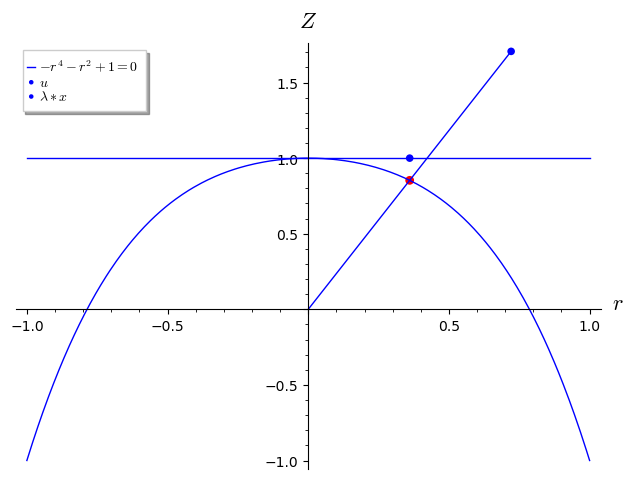

In [19]:
sum(
    [
        plot(eq, axes_labels=["$r$", "$Z$"], legend_label=f"${latex(eq)}$"),
        line([(-1, 1), (1, 1)]),
        point(f(u_), legend_label="$u$", size=30),
        # point(f(x_), legend_label=r"$x = \psi(u)$", size=30),
        line([(0, 0), 2 * f(x_)]),
        point(f(lx_), legend_label=r"$\lambda * x$", size=30),
    ]
    + [
        point((s_.rhs(), psi(s_.rhs()).subs(m)), color="red", size=40)
        for s_ in s
        if s_.rhs() in RR and s_.rhs() > 0
    ]
)

# Use it

In [20]:
x = vector(list(var("x1 x2 x3")))
x

(x1, x2, x3)

In [29]:
eq = (var('w') == r_ / psi(r_).subs({r(x) / x[2]: var("w")}))
eq

w == r_/(lambda_2*r_^4 + lambda_1*r_^2 + 1)

In [35]:
print(eq)

w == r_/(lambda_2*r_^4 + lambda_1*r_^2 + 1)


In [30]:
s = solve(eq, r_)
s

[r_ == -1/2*sqrt(-2/3*(1/2)^(2/3)*(lambda_1^2/lambda_2^2 + 12/lambda_2)/(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) - 1/3*(1/2)^(1/3)*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) - 4/3*lambda_1/lambda_2 - 2*sqrt(6)*(1/2)^(2/3)/(w*sqrt(((1/2)^(2/3)*lambda_2^2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(2/3) - 2*(1/2)^(1/3)*lambda_1*lambda_2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) + lambda_1^2 + 12*lambda_2)/(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3)))) - 1/6*sqrt(6)*sqrt((1/2)^(2/3)*((1/2)^(2/3)*lambda_2^2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(2/3) - 2*(1/2)^(1/3)*lambda_1*lambda_2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) + lambda_1^2 + 12*lambda_2)/(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3))/lambda_2, r_ == 1/2*sqrt(-2/3*(1/2)^(2/3)*(lambda_1^2/lambda_2^2 + 12/lambda_2)/(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) - 1/3*(1/2)^(1/3)*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) - 4/3*lambda_1/lambda_2 - 2*sqrt(6)*(1/2)^(2/3)/(w*sqrt(((1/2)^(2/3)*lambda_2^2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(2/3) - 2*(1/2)^(1/3)*lambda_1*lambda_2*(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2)/(lambda_2^2*w^2))^(1/3) + lambda_1^2 + 12*lambda_2)/(2*lambda_1^3/lambda_2^3 + 36*lambda_1/lambda_2^2 - 27*(4*lambda_1*w^2 - 1)/(lambda_2^2*w^2) + 9*sqrt(1/3)*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1

In [31]:
s[0].expand().simplify()

r_ == -1/12*sqrt(6)*2^(2/3)*sqrt(-2^(2/3)*lambda_1*lambda_2 + 1/2*2^(1/3)*lambda_2^2*(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3) + lambda_1^2/(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3) + 12*lambda_2/(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3))/lambda_2 - 1/2*sqrt(-1/6*2^(2/3)*(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3) - 4/3*lambda_1/lambda_2 - 1/3*2^(1/3)*lambda_1^2/(lambda_2^2*(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3)) - sqrt(6)*2^(1/3)/(sqrt(-2^(2/3)*lambda_1*lambda_2 + 1/2*2^(1/3)*lambda_2^2*(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3) + lambda_1^2/(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3) + 12*lambda_2/(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3))*w) - 4*2^(1/3)/(lambda_2*(2*lambda_1^3/lambda_2^3 - 72*lambda_1/lambda_2^2 + 3*sqrt(3)*sqrt(-16*lambda_1^4*w^4/lambda_2 + 128*lambda_1^2*w^4 - 256*lambda_2*w^4 + 4*lambda_1^3*w^2/lambda_2 - 144*lambda_1*w^2 + 27)/(lambda_2^2*w^2) + 27/(lambda_2^2*w^2))^(1/3)))

In [32]:
for s_ in s:
    display(s_.simplify_full())

r_ == -1/12*sqrt(6)*(lambda_2*sqrt(-(6*sqrt(6)*2^(5/6)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + (8*lambda_1*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3) + 2*(2^(1/3)*lambda_1^2 + 12*2^(1/3)*lambda_2)*w)*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/(lambda_2*w*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))) + sqrt((2*2^(1/3)*lambda_1^2*lambda_2 + 24*2^(1/3)*lambda_2^2 - 4*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/lambda_2

r_ == 1/12*sqrt(6)*(lambda_2*sqrt(-(6*sqrt(6)*2^(5/6)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + (8*lambda_1*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3) + 2*(2^(1/3)*lambda_1^2 + 12*2^(1/3)*lambda_2)*w)*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/(lambda_2*w*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))) - sqrt((2*2^(1/3)*lambda_1^2*lambda_2 + 24*2^(1/3)*lambda_2^2 - 4*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/lambda_2

r_ == -1/12*sqrt(6)*(lambda_2*sqrt((6*sqrt(6)*2^(5/6)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) - (8*lambda_1*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3) + 2*(2^(1/3)*lambda_1^2 + 12*2^(1/3)*lambda_2)*w)*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/(lambda_2*w*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))) - sqrt((2*2^(1/3)*lambda_1^2*lambda_2 + 24*2^(1/3)*lambda_2^2 - 4*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/lambda_2

r_ == 1/12*sqrt(6)*(lambda_2*sqrt((6*sqrt(6)*2^(5/6)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) - (8*lambda_1*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3) + 2*(2^(1/3)*lambda_1^2 + 12*2^(1/3)*lambda_2)*w)*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/(lambda_2*w*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 24*lambda_2^2 + 2^(1/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3))) + sqrt((2*2^(1/3)*lambda_1^2*lambda_2 + 24*2^(1/3)*lambda_2^2 - 4*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3))/((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3)))/lambda_2

In [34]:
for s_ in s:
    print(s_.simplify_full())

r_ == -1/12*sqrt(6)*(lambda_2*sqrt(-(6*sqrt(6)*2^(5/6)*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + (8*lambda_1*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(1/3) + 2^(2/3)*w*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lambda_2^2)*w^4 - 4*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 - 27*lambda_2)/lambda_2) + 27*lambda_2)/w^2)^(2/3) + 2*(2^(1/3)*lambda_1^2 + 12*2^(1/3)*lambda_2)*w)*sqrt((2*lambda_1^2*lambda_2 - 2*2^(2/3)*lambda_1*lambda_2*((2*(lambda_1^3 - 36*lambda_1*lambda_2)*w^2 + 3*sqrt(3)*lambda_2*sqrt(-(16*(lambda_1^4 - 8*lambda_1^2*lambda_2 + 16*lam

In [26]:
for s_ in s:
    print(s_.expand().simplify_full())

r_ == -1/12*2^(1/6)*(sqrt(3)*2^(1/3)*sqrt(sqrt(2)*((11*2^(5/6)*w - 4*sqrt(2)*w*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3) - 2^(1/6)*w*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(2/3))*sqrt(-(2*2^(2/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3) - 2^(1/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(2/3) + 22)/((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3)) + 6*sqrt(6)*2^(1/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3))/(w*sqrt(-(2*2^(2/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3) - 2^(1/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(2/3) + 22)/((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3))*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3))) + sqrt(6)*sqrt(-(2*2^(2/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(1/3) - 2^(1/3)*((74*w^2 + 9*sqrt(400/3*w^4 + 148/3*w^2 + 9) + 27)/w^2)^(2/3) + 22)/((74*w^2 + 9*sqrt(400/3*w^4